# Name : Aman Shriwastav
# Batch : PGA17
    

# Model Building On Travel Insurance

problem Statement :To predict whether the insurance buyer will claim their travel insurance or not.

# Goal:
The goal of this project is to predict whether insurance policies are claimed based on some of features.
Before doing data analysis, we will introduce travel insurance policy first.
Usually, travel insurance will have coverage for travelers concerns,
including flight delays, trip cancellation, or loggage loss. 
And, some of policies include medical emergency. 
It means that the insured's age might have an influence on whether the policy is claimed.

# Problem:
For any insurance policy, we would like to know whether some features lead to the policy claimed. 
Some features like age, gender or commision value could have influence on that.

In [1]:
#  Target: Claim Status (Claim.Status)
#  Name of agency (Agency)
#  Type of travel insurance agencies (Agency.Type)
#  Distribution channel of travel insurance agencies (Distribution.Channel)
#  Name of the travel insurance products (Product.Name)
#  Duration of travel (Duration)
#  Destination of travel (Destination)
#  Amount of sales of travel insurance policies (Net.Sales)
#  Commission received for travel insurance agency (Commission)
#  Gender of insured (Gender)
#  Age of insured (Age)

# import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score,roc_auc_score, roc_curve, auc, precision_score, recall_score

# import the dataset

In [3]:
#to display all the columns of the dataset.

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Loading/import the dataset.
ins_tr= pd.read_csv(r"C:\Users\amans\Downloads\travel ins_train.csv")
ins_test= pd.read_csv(r"C:\Users\amans\Downloads\travel ins_test.csv")


In [4]:
ins_tr.shape

(49999, 11)

In [5]:
ins_test.shape

(13327, 10)

In [6]:
ins_tr.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [7]:
ins_test.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,42,SINGAPORE,10.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,2,VIET NAM,10.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,37,"KOREA, REPUBLIC OF",43.0,0.0,NaN,36
3,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,36
4,EPX,Travel Agency,Online,Cancellation Plan,17,CHINA,19.0,0.0,NaN,36


# Check for missing values

In [8]:
ins_tr.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  36786
Age                         0
dtype: int64

In [9]:
ins_test.isnull().sum()

Agency                     0
Agency Type                0
Distribution Channel       0
Product Name               0
Duration                   0
Destination                0
Net Sales                  0
Commision (in value)       0
Gender                  8321
Age                        0
dtype: int64

In [10]:
ins_tr.Gender=ins_tr.Gender.fillna("M")

In [11]:
ins_test.Gender=ins_test.Gender.fillna("M")

In [12]:
ins_tr.Gender.value_counts()

M    43671
F     6328
Name: Gender, dtype: int64

In [13]:
ins_test.Gender.value_counts()

M    10783
F     2544
Name: Gender, dtype: int64

In [14]:
ins_tr.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

In [15]:
# rename the column name as per your own.

In [16]:
ins_tr.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name',
                     'Net Sales':'Net_Sales', 'Commision (in value)':'Commision_in_value'},inplace=True)

In [17]:
ins_test.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name',
                     'Net Sales':'Net_Sales', 'Commision (in value)':'Commision_in_value'},inplace=True)

In [18]:
ins_tr.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision_in_value,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,M,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,M,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,M,41


In [19]:
ins_test.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision_in_value,Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,42,SINGAPORE,10.0,0.0,M,36
1,EPX,Travel Agency,Online,Cancellation Plan,2,VIET NAM,10.0,0.0,M,36
2,EPX,Travel Agency,Online,Cancellation Plan,37,"KOREA, REPUBLIC OF",43.0,0.0,M,36
3,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,M,36
4,EPX,Travel Agency,Online,Cancellation Plan,17,CHINA,19.0,0.0,M,36


In [20]:
ins_tr.Claim.value_counts()   

No     49340
Yes      659
Name: Claim, dtype: int64

In [21]:
def cleanYesNo(s):
    if s == "Yes":
        return 1
    elif s == "No":
        return 0

ins_tr["Claim_status"] = ins_tr.loc[:,'Claim'].apply(cleanYesNo)


# I crate a new columns claim status and copy a data from claim to claim status and then next , i will drop the column claim.

In [22]:
ins_tr.drop(["Claim"], axis = 1, inplace = True)

In [23]:
ins_tr.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision_in_value,Gender,Age,Claim_status
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,81,0
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,71,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,M,32,0
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,M,32,0
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,M,41,0


# Exploratory Data Analysis

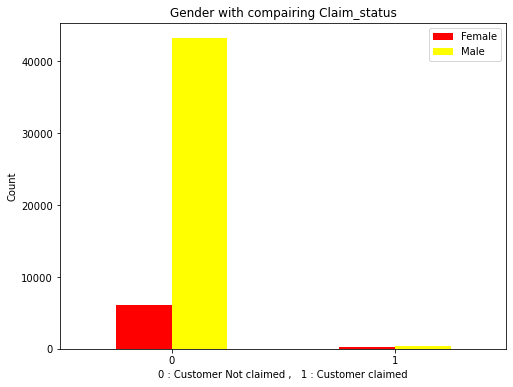

In [24]:
pd.crosstab(ins_tr['Claim_status'], ins_tr['Gender']).plot(kind="bar", figsize=(8,6), colormap="autumn")

plt.title("Gender with compairing Claim_status")

plt.xlabel("0 : Customer Not claimed ,   1 : Customer claimed")
plt.ylabel("Count")

plt.legend(["Female", "Male"])

plt.xticks(rotation=0);

In [25]:
# from seeing this, i can say that 90% people who are not claimed their travel insurance & 
# 10% people who claimed their travel insurance.

In [26]:
print("Claimed")
print(ins_tr[ins_tr["Claim_status"] == 1]["Claim_status"].count())
print("Not Claimed")
print(ins_tr[ins_tr["Claim_status"] == 0]["Claim_status"].count())

Claimed
659
Not Claimed
49340


In [27]:
# Imbalanced data set is as follows. Claimed policies are 659. However, Not Claimed policies are 49340.

Text(0, 0.5, 'Count')

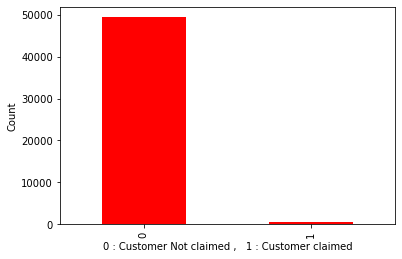

In [28]:
ins_tr["Claim_status"].value_counts().plot.bar(colormap="autumn")
plt.xlabel("0 : Customer Not claimed ,   1 : Customer claimed")
plt.ylabel("Count")

In [29]:
# by seeing the target variable means claimed status 
# For any insurance policy, we would like to know whether some features lead to the policy claimed. 
# Some features like age, gender or commision value could have influence on that.

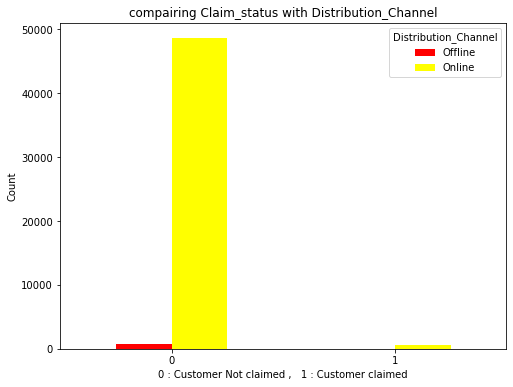

In [30]:
pd.crosstab(ins_tr['Claim_status'], ins_tr['Distribution_Channel']).plot(kind="bar", figsize=(8,6), colormap="autumn")

plt.title("compairing Claim_status with Distribution_Channel")

plt.xlabel("0 : Customer Not claimed ,   1 : Customer claimed")
plt.ylabel("Count")

plt.xticks(rotation=0);

In [31]:
# by seeing this , we can say that 
# Customers who didn't Previously_Insured have good chance for claimed Insurnce from Distribution_Channel.

<AxesSubplot:xlabel='Claim_status', ylabel='Commision_in_value'>

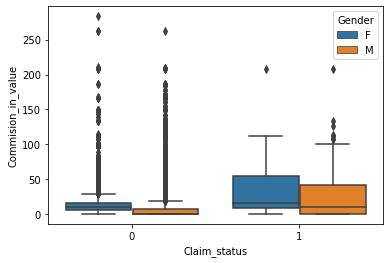

In [32]:
sns.boxplot(x="Claim_status" , y="Commision_in_value" , data= ins_tr , hue="Gender")

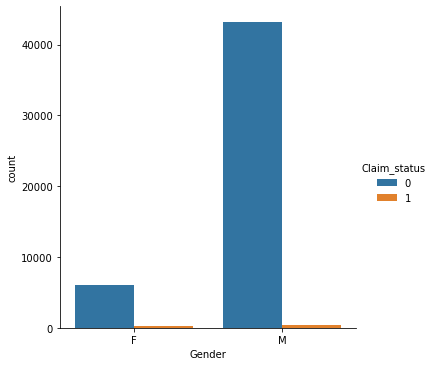

In [33]:
sns.catplot(x= "Gender" , hue="Claim_status", kind="count",data=ins_tr)

In [34]:
# also by seeing this we can not consider or says that very few people are claimed their travel insurance.

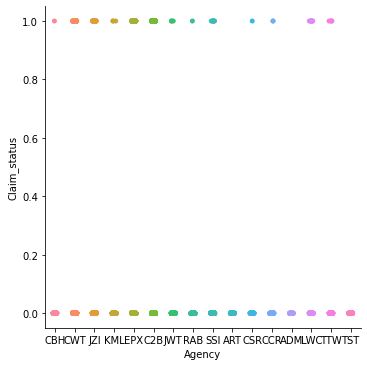

In [35]:
sns.catplot(x="Agency"  ,  y = "Claim_status"  ,  data=ins_tr)

In [36]:
# The following visualization is to understand whether claimed policies happens in few of countries. 
# If an abudunce in one of countries means that this country
# might have some of unavoidable situtation that lead to injury or disease.

<AxesSubplot:>

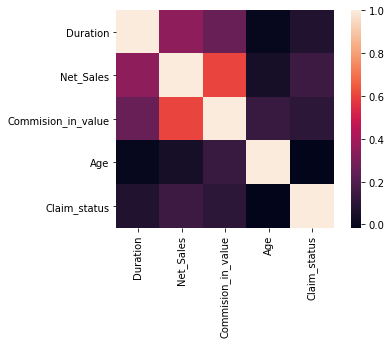

In [37]:
sns.heatmap(ins_tr.corr(), square=True)

In [38]:
# by using Label Encoder we can convert the non-numerical data to numerical.

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
ins_tr.select_dtypes(include=['object']).columns

Index(['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name',
       'Destination', 'Gender'],
      dtype='object')

In [42]:
ins_tr[ins_tr.select_dtypes(include=['object']).columns]=ins_tr[ins_tr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [43]:
ins_tr.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision_in_value,Gender,Age,Claim_status
0,3,1,0,12,186,76,-29.0,9.57,0,81,0
1,3,1,0,12,186,76,-29.0,9.57,0,71,0
2,6,1,1,16,65,4,-49.5,29.70,1,32,0
3,6,1,1,16,60,4,-39.6,23.76,1,32,0
4,6,1,1,16,79,58,-19.8,11.88,1,41,0


# Train_Test_Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train , test  = train_test_split(ins_tr,test_size = .2)

In [46]:
train_x = ins_tr.iloc[:  , 0 : -1]

train_y = ins_tr.iloc[:,-1] 

In [47]:
test_x = ins_tr.iloc[:,0:-1]

test_y = ins_tr.iloc[:,-1]

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(train_x,train_y)
log_reg.score(train_x,train_y)
pred_test = log_reg.predict(test_x)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred_test , test_y))

pred_value_proba =log_reg.predict_proba(test_x)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc= roc_auc_score(test_y ,pred_test)
log_roc_auc

from sklearn.metrics import classification_report
print(classification_report(test_y, pred_test ,target_names = ["Claimed", "Non-claimed"]))

C:\Users\amans\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[49333   659]
 [    7     0]]
              precision    recall  f1-score   support

     Claimed       0.99      1.00      0.99     49340
 Non-claimed       0.00      0.00      0.00       659

    accuracy                           0.99     49999
   macro avg       0.49      0.50      0.50     49999
weighted avg       0.97      0.99      0.98     49999



In [49]:
# As we can see from the confusion matrix there is class embalence problem.To over come this problem we use SMOTE.

# Now we will try with over sampling

In [50]:
# by importing smote 
# SMOTE is an oversampling technique that generates synthetic samples from the minority class.
# It is used to obtain a synthetically class-balanced or nearly class-balanced training set,
# which is then used to train the classifier.

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=150)
x_ins, y_ins = sm.fit_sample(train_x, train_y) 

In [51]:
log_reg = LogisticRegression( penalty='l2',
                             dual=False,
                             tol=0.0001,
                             C=1.0,
                             fit_intercept=True,
                             intercept_scaling=1,
                             class_weight=None)

In [52]:
# Rebuild the model with best parameters.

log_reg.fit(x_ins,y_ins)
log_reg.score(x_ins, y_ins)
pred_test = log_reg.predict(test_x)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred_test , test_y))

pred_value_proba =log_reg.predict_proba(test_x)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc= roc_auc_score(test_y ,pred_test)
log_roc_auc

from sklearn.metrics import classification_report
print(classification_report(test_y, pred_test ,target_names = ["Claimed", "Non-claimed"]))

C:\Users\amans\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[41610   259]
 [ 7730   400]]
              precision    recall  f1-score   support

     Claimed       0.99      0.84      0.91     49340
 Non-claimed       0.05      0.61      0.09       659

    accuracy                           0.84     49999
   macro avg       0.52      0.73      0.50     49999
weighted avg       0.98      0.84      0.90     49999



 # Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
pred_dt=dt.predict(test_x)
print(confusion_matrix(pred_dt,test_y))
pred_value_proba =dt.predict_proba(test_x)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc= roc_auc_score(test_y ,pred_dt)
log_roc_auc

from sklearn.metrics import classification_report
print(classification_report(test_y, pred_dt, target_names = ["Claimed", "Non-claimed"]))


[[49338    63]
 [    2   596]]
              precision    recall  f1-score   support

     Claimed       1.00      1.00      1.00     49340
 Non-claimed       1.00      0.90      0.95       659

    accuracy                           1.00     49999
   macro avg       1.00      0.95      0.97     49999
weighted avg       1.00      1.00      1.00     49999



In [54]:
# Hyperparameter Tunning with the Grid Search
from sklearn.model_selection import GridSearchCV

In [55]:
search_dict = {"criterion":["gini","entropy"],"max_depth":range(2,4),"min_samples_split":range(50,75)}

In [56]:
dt = DecisionTreeClassifier()

In [57]:
grid = GridSearchCV(dt,param_grid = search_dict,cv=3,n_jobs=-1,)

In [58]:
grid.fit(x_ins ,y_ins)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'min_samples_split': range(50, 75)})

In [59]:
grid.best_params_ 

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 50}

In [60]:
# Rebuild the model with best parameters.
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 50)
dt.fit(x_ins, y_ins)
pred_dt=dt.predict(test_x)
print(confusion_matrix(pred_dt,test_y))
pred_value_proba =dt.predict_proba(test_x)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc= roc_auc_score(test_y ,pred_dt)
log_roc_auc

from sklearn.metrics import classification_report
print(classification_report(test_y, pred_dt, target_names = ["Claimed", "Non-claimed"]))


[[35404   179]
 [13936   480]]
              precision    recall  f1-score   support

     Claimed       0.99      0.72      0.83     49340
 Non-claimed       0.03      0.73      0.06       659

    accuracy                           0.72     49999
   macro avg       0.51      0.72      0.45     49999
weighted avg       0.98      0.72      0.82     49999



 # Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,
    max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,bootstrap=True,oob_score=False,
    n_jobs=None,random_state=None,verbose=0,warm_start=False,class_weight=None,ccp_alpha=0.0,max_samples=None,)

rfc.fit(train_x,train_y)
pred_rfc = rfc.predict(test_x)
pred_rfc
print(confusion_matrix(pred_rfc, test_y))
pred_value_proba =rfc.predict_proba(test_x)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc= roc_auc_score(test_y ,pred_rfc)
log_roc_auc
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_rfc, target_names = ["Claimed", "Non-claimed"]))


[[49334    60]
 [    6   599]]
              precision    recall  f1-score   support

     Claimed       1.00      1.00      1.00     49340
 Non-claimed       0.99      0.91      0.95       659

    accuracy                           1.00     49999
   macro avg       0.99      0.95      0.97     49999
weighted avg       1.00      1.00      1.00     49999



In [62]:
rfc.feature_importances_

array([0.01689443, 0.00276077, 0.00048847, 0.02213703, 0.34965921,
       0.06963278, 0.16229428, 0.09249004, 0.02250953, 0.26113346])

In [63]:
rfc.feature_importances_.sum()

1.0

In [64]:
rfc_feature_imp = pd.DataFrame({"Feature":train_x.columns,"Score":rfc.feature_importances_})
rfc_feature_imp

,Feature,Score
0,Agency,0.016894
1,Agency_Type,0.002761
2,Distribution_Channel,0.000488
3,Product_Name,0.022137
4,Duration,0.349659
5,Destination,0.069633
6,Net_Sales,0.162294
7,Commision_in_value,0.092490
8,Gender,0.022510
9,Age,0.261133


In [65]:
#  manualHyperparameter Tunning with Grid SearchCv

In [66]:
search_dict = {"criterion":['entropy','gini'],"n_estimators":range(200,500,10),"max_features":['auto','sqrt','log2'],
               "max_depth":range(2,7)} 

In [67]:
rfc = RandomForestClassifier(
    n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_impurity_split=None,bootstrap=True,oob_score=False,
    n_jobs=None,random_state=None,verbose=0,warm_start=False,class_weight=None,ccp_alpha=0.0,max_samples=None)


In [68]:
grid = GridSearchCV(dt,param_grid = search_dict,n_jobs=-1,)

In [69]:
# Rebuild the model with best parameters.

rfc = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=3)
rfc.fit(x_ins, y_ins,sample_weight=None)
pred_rfc = rfc.predict(test_x)
pred_rfc
print(confusion_matrix(pred_rfc, test_y))
pred_value_proba =rfc.predict_proba(test_x)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc= roc_auc_score(test_y ,pred_rfc)
log_roc_auc
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_rfc, target_names = ["Claimed", "Non-claimed"]))



[[43570   282]
 [ 5770   377]]
              precision    recall  f1-score   support

     Claimed       0.99      0.88      0.94     49340
 Non-claimed       0.06      0.57      0.11       659

    accuracy                           0.88     49999
   macro avg       0.53      0.73      0.52     49999
weighted avg       0.98      0.88      0.92     49999



In [70]:
# ! pip install xgboost

In [71]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.01, n_jobs=-1, n_estimators=1000,max_depth=10, objective = 'reg:squarederror', 
                    colsample_bytree = 0.5, min_child_weight = 5,subsample = 0.7,gamma = 4.038,reg_lambda = 0.2695,
                    reg_alpha = 66 )

xgb.fit(x_ins,y_ins)

pred_xgb = xgb.predict(train_x)
pred_xgb

print(confusion_matrix(train_y, pred_xgb))


pred_value_proba =xgb.predict_proba(test_x)
pred_value_proba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc= roc_auc_score(test_y ,pred_xgb)
log_roc_auc
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_xgb, target_names = ["Claimed", "Non-claimed"]))


C:\Users\amans\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[42585  6755]
 [  210   449]]
              precision    recall  f1-score   support

     Claimed       1.00      0.86      0.92     49340
 Non-claimed       0.06      0.68      0.11       659

    accuracy                           0.86     49999
   macro avg       0.53      0.77      0.52     49999
weighted avg       0.98      0.86      0.91     49999



# Summary

In [72]:
model_dict={'Models Used':['LogisticRegression','DecisionTree','RandomForest','XG_Boost'],
            'Accuracy':[0.82,0.72,0.88,0.86],'Roc-Auc Score':[0.52,0.51,0.53,0.53]}
pd.DataFrame(model_dict,columns=['Models Used','Accuracy','Roc-Auc Score'])

,Models Used,Accuracy,Roc-Auc Score
0,LogisticRegression,0.82,0.52
1,DecisionTree,0.72,0.51
2,RandomForest,0.88,0.53
3,XG_Boost,0.86,0.53


# conclusion

# From the above analysis it is quite evidient that Random Forest Classifier works better than other algoriths. by compairing all of the accuracy and AUC_ROC score that of  accuracy of random forest is about 88% and AUROC Score is 53%

# PREDICTION ON TEST DATA


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()

In [75]:
ins_test.select_dtypes(include=['object']).columns

Index(['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name',
       'Destination', 'Gender'],
      dtype='object')

In [76]:
ins_test[ins_test.select_dtypes(include=['object']).columns]=ins_test[ins_test.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [77]:
ins_test.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision_in_value,Gender,Age
0,7,1,1,10,42,84,10.0,0.0,1,36
1,7,1,1,10,2,104,10.0,0.0,1,36
2,7,1,1,10,37,50,43.0,0.0,1,36
3,7,1,1,10,5,56,10.0,0.0,1,36
4,7,1,1,10,17,16,19.0,0.0,1,36


In [78]:
prediction = rfc.predict(ins_test)

In [79]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)